## Q-Learning
Q-learning is an off policy reinforcement learning algorithm that seeks to find the best action to take given the current state. It's considered off-policy because the q-learning function learns from actions that are outside the current policy, like taking random actions, and therefore a policy isn't neede

Q-learning is a model-free reinforcement learning algorithm to learn a policy telling an agent what action to take under what circumstances. It does not require a model of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations

In [4]:
from IPython.display import Image
img = 'Q-learning.png'
Image(url=img)

### Technique to find the optimal policy in Markov Decision Process.Optimal means that expected value of total reward over all successive steps in max achievable.So aim is to find the optimal policy by learning optimal Q-Values for each state-action pair

### Formula:-

In [6]:
img = 'Q_formula.png'
Image(url=img)

In [8]:
# Install gym
pip install gym

In [15]:
#import libraries
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

In [12]:
STATES

16

In [13]:
ACTIONS

4

In [14]:
#  4 * 16
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [16]:
EPISODES = 3000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment
LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96
RENDER = False # if you want to see training set to true
epsilon = 0.9

In [17]:
rewards = []
for episode in range(EPISODES):

   #get the starting state in Evr. after reset
  state = env.reset()
  for _ in range(MAX_STEPS):  #Explore the env. till the max step;
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      #Random action in Envr.
      action = env.action_space.sample()  
    else:
      #next state of agent
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)
    #we dont' care about the info values _, that's why we ignore it ...

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.81065112e-01 5.72831485e-03 7.01252675e-03 5.33288537e-03]
 [1.93203322e-03 9.63463514e-04 1.86939774e-03 2.57671087e-01]
 [1.75669007e-01 4.45882972e-03 2.44666396e-03 4.78647060e-03]
 [9.41558191e-04 1.85060493e-03 1.02897529e-03 4.94354737e-03]
 [5.15299355e-01 7.09414162e-03 3.20750932e-03 6.21138917e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.47681945e-05 2.38359994e-05 6.30069604e-02 2.57429762e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.47279115e-03 1.94326383e-03 4.14080322e-03 6.25777473e-01]
 [9.62956254e-04 4.09698661e-01 6.18372872e-04 2.14972818e-03]
 [8.39316301e-01 7.26195355e-04 7.87096865e-04 9.37777864e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.53784107e-02 2.20961018e-02 8.43755388e-01 3.16077066e-03]
 [1.35352858e-01 9.75423391e-01 9.07440123e-02 1.29663229e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [18]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


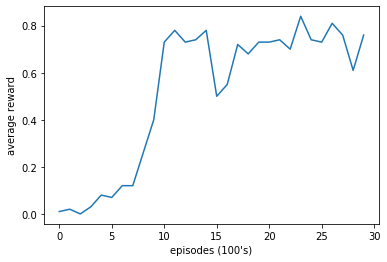

In [21]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()

# Follow me for more useful resources @

https://www.linkedin.com/in/piyushpathak03/
    
https://anirudhrapathak3.wixsite.com/piyush